### Goal: Make IPL interesting for Vipul with the help of the data visualization(facts, trivia, stats, etc)
#### Constraints:
- Vipul doest have much time so graphs/plots should be easy to understand
- No additional data other than the provided
 

## Dependency

In [873]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno
import os
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
%matplotlib inline

In [3]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [4]:
plt.style.use('seaborn')

In [52]:
import warnings
warnings.filterwarnings('ignore')


In [5]:
# read the data
df_bb = pd.read_csv("../../data/Ball_by_Ball.csv")
df_match = pd.read_csv("../../data/Match.csv")
df_player_match = pd.read_csv("../../data/Player_Match.csv")
df_player = pd.read_csv("../../data/Player.csv")
df_season = pd.read_csv("../../data/Season.csv")
df_team = pd.read_csv("../../data/Team.csv")

### **Venue Inspection**

In [6]:
df_match.head()

Match_Id Match_Date  Team_Name_Id  Opponent_Team_Id  Season_Id  \
0    335987  18-Apr-08             2                 1          1   
1    335988  19-Apr-08             4                 3          1   
2    335989  19-Apr-08             6                 5          1   
3    335990  20-Apr-08             7                 2          1   
4    335991  20-Apr-08             1                 8          1   

                                   Venue_Name  Toss_Winner_Id Toss_Decision  \
0                       M Chinnaswamy Stadium               2         field   
1  Punjab Cricket Association Stadium, Mohali               3           bat   
2                            Feroz Shah Kotla               5           bat   
3                            Wankhede Stadium               7           bat   
4                                Eden Gardens               8           bat   

   IS_Superover  IS_Result  Is_DuckWorthLewis    Win_Type  Won_By  \
0             0          1                  0     by runs   140.0   
1             0          1                  0     by runs    33.0   
2             0          1                  0  by wickets     9.0   
3             0          1                  0  by wickets     5.0   
4             0          1                  0  by wickets     5.0   

   Match_Winner_Id  Man_Of_The_Match_Id  First_Umpire_Id  Second_Umpire_Id  \
0              1.0                  2.0              470               477   
1              3.0                 19.0              471               487   
2              6.0                 90.0              472               512   
3              2.0                 11.0              473               476   
4              1.0                  4.0              474               486   

    City_Name Host_Country  
0   Bangalore        India  
1  Chandigarh        India  
2       Delhi        India  
3      Mumbai        India  
4     Kolkata        India

#### 1. List of vanues

In [7]:
df_match.Venue_Name.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

#### Host Countries 

In [8]:
df_match.Host_Country.unique()

array(['India', 'South Africa', 'U.A.E'], dtype=object)

### City Name

In [9]:
df_match.City_Name.unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Rajkot', 'Kanpur'], dtype=object)

In [10]:
df_match.City_Name.unique().__len__()

29

### Toss Result vs Match Result analysis

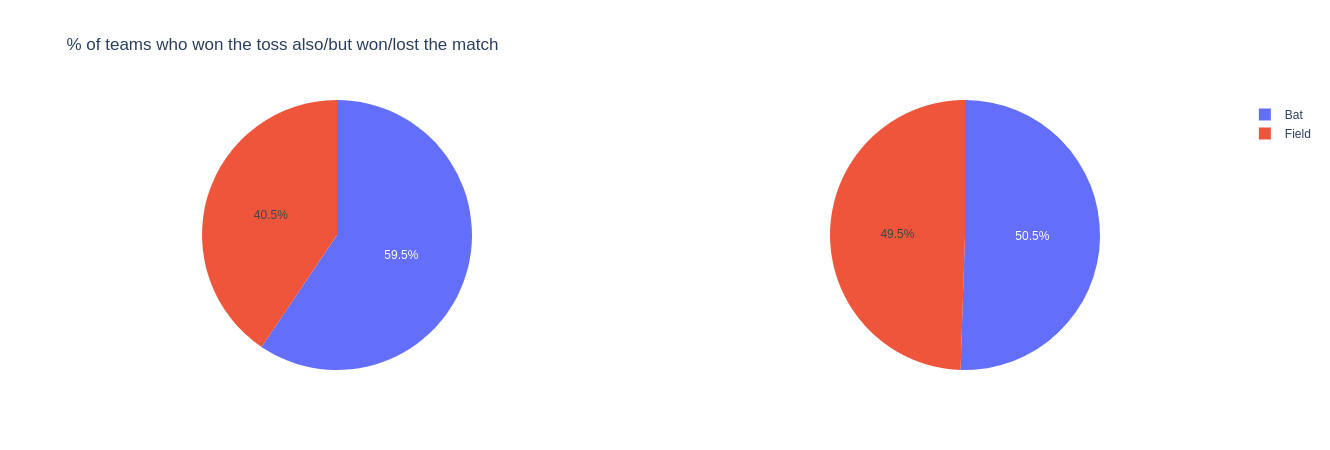

In [698]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

labels = ['Bat','Field']

# values = df_match[df_match.IS_Result==1][df_match.Toss_Winner_Id==df_match.Match_Winner_Id].Toss_Decision.value_counts().values

fig.add_trace(
    go.Pie(
        labels=labels, 
        values=df_match[df_match.IS_Result==1][df_match.Toss_Winner_Id==df_match.Match_Winner_Id].Toss_Decision.value_counts().values,
#         hole=.5,
        name="Winners"
    ),
    1, 1
)
fig.add_trace(
    go.Pie(
        labels=labels, 
        values=df_match[df_match.IS_Result==1][df_match.Toss_Winner_Id!=df_match.Match_Winner_Id].Toss_Decision.value_counts().values, 
#         hole=.5,
        name="Loosers"
    ),
    1, 2
)
fig.update_layout(
    title_text="% of teams who won the toss also/but won/lost the match",
    # Add annotations in the center of the donut pies.
#     annotations=[dict(text='Won', x=0.20, y=0.5, font_size=16, showarrow=False),
#                  dict(text='Lost', x=0.80, y=0.5, font_size=16, showarrow=False)])
)
fig.show()

In [699]:
df_match[df_match.IS_Result==1][df_match.Toss_Winner_Id==df_match.Match_Winner_Id].Toss_Decision.value_counts().values

array([173, 118])

In [700]:
df_match[df_match.IS_Result==1][df_match.Toss_Winner_Id!=df_match.Match_Winner_Id].Toss_Decision.value_counts().values

array([143, 140])

#### Most MOM awards

In [288]:
def get_names(idx):
    players = []
    for i in idx:
        players.append(df_player[df_player.Player_Id==i].Player_Name.values[0])
    return players

In [289]:
moms = df_match['Man_Of_The_Match_Id'].value_counts().values[:20]
idx = df_match['Man_Of_The_Match_Id'].value_counts().index[:20]

In [290]:
players=get_names(idx)

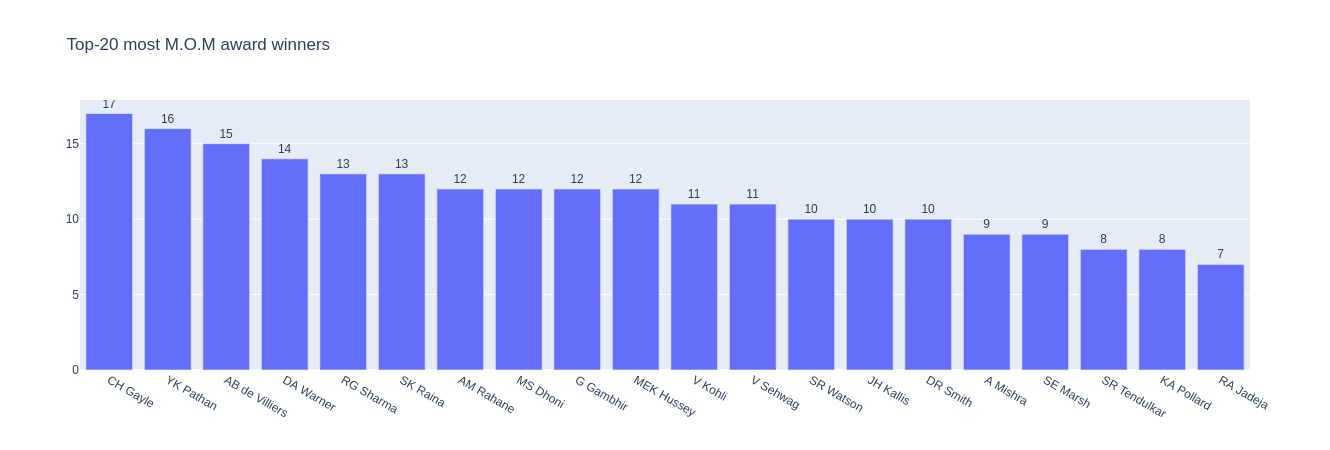

In [376]:
fig = go.Figure([go.Bar(x=players, y=moms, text=moms, textposition='outside')])
fig.update_layout(
    title="Top-20 most M.O.M award winners"
)
fig.update_layout()
fig.show()

In [833]:
# print(players)

### Number of Victories by teams in each season (2008-2016)

In [834]:
df_team.head()

Team_Id                    Team_Name Team_Short_Code
0        1        Kolkata Knight Riders             KKR
1        2  Royal Challengers Bangalore             RCB
2        3          Chennai Super Kings             CSK
3        4              Kings XI Punjab            KXIP
4        5             Rajasthan Royals              RR

In [852]:
def get_teams(ids):
    
    teams = []
    
    short_code = []
    
    for _id in ids:
        
        teams.append(df_team.Team_Name[df_team.Team_Id==_id].values[0])
        short_code.append(df_team.Team_Short_Code[df_team.Team_Id==_id].values[0])
        
    return teams, short_code

def get_data(season):
    team_ids = df_match[df_match.Season_Id==season].Match_Winner_Id.value_counts().index.values
    teams = df_team.Team_Name[df_team.Team_Id.isin(team_ids)]
    victories = df_match[df_match.Season_Id==season].Match_Winner_Id.value_counts().values
    return teams, victories


In [855]:
# get_teams([df_.Match_Winner_Id])

In [856]:
# sid+2007

['Rajasthan Royals', 'Kings XI Punjab', 'Chennai Super Kings', 'Mumbai Indians', 'Delhi Daredevils', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Deccan Chargers'] [13 10  9  7  7  6  4  2]
['Delhi Daredevils', 'Deccan Chargers', 'Royal Challengers Bangalore', 'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals', 'Mumbai Indians', 'Kolkata Knight Riders'] [10  9  9  8  7  6  5  3]
['Mumbai Indians', 'Chennai Super Kings', 'Royal Challengers Bangalore', 'Deccan Chargers', 'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals', 'Kings XI Punjab'] [11  9  8  8  7  7  6  4]
['Chennai Super Kings', 'Mumbai Indians', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Deccan Chargers', 'Rajasthan Royals', 'Delhi Daredevils', 'Pune Warriors'] [11 10 10  8  7  6  6  6  4  4]
['Kolkata Knight Riders', 'Delhi Daredevils', 'Chennai Super Kings', 'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore', 'Rajasth

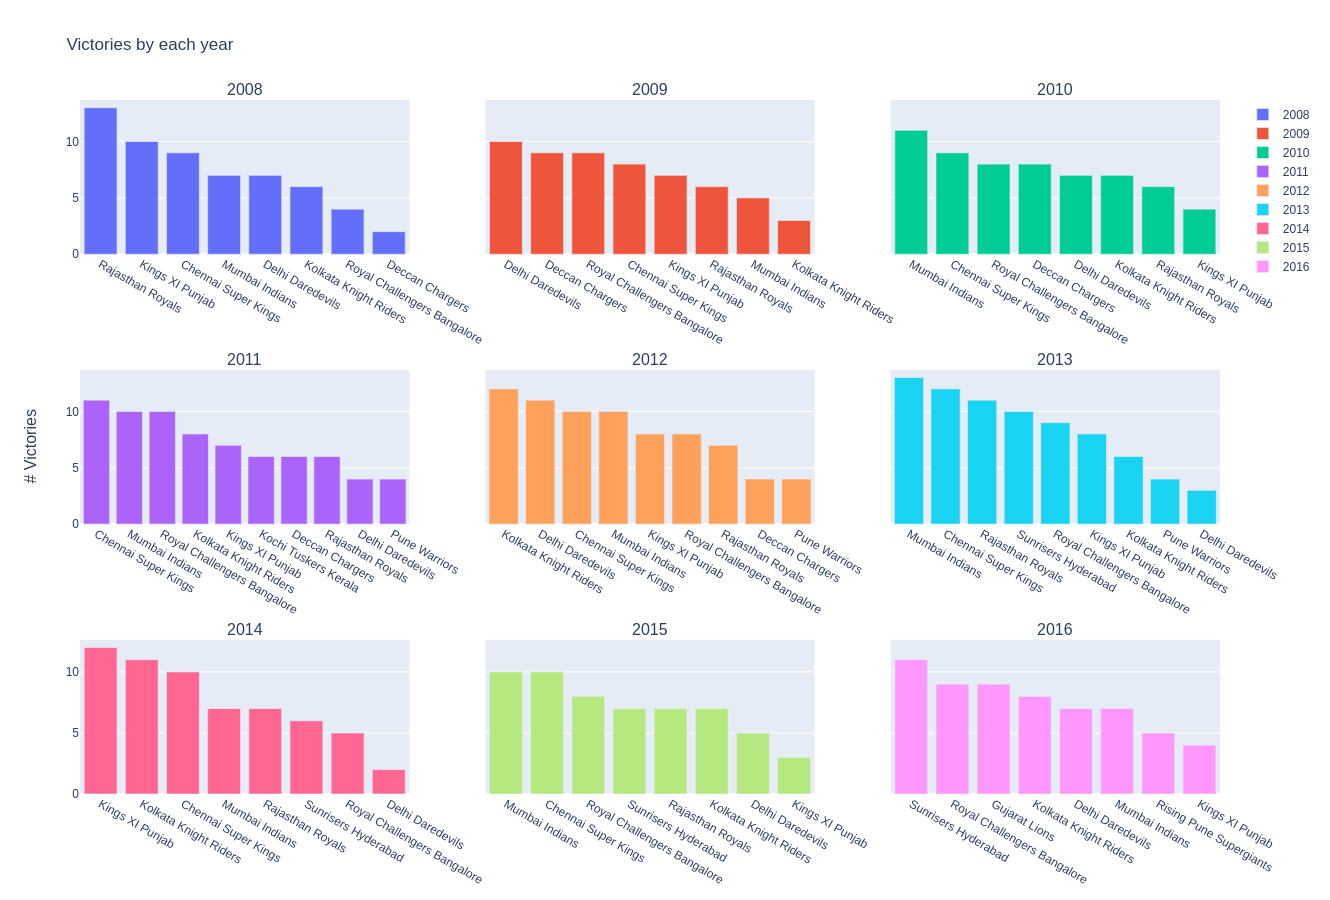

<Figure size 1728x864 with 0 Axes>

In [388]:
plt.figure(figsize=(24, 12))
fig = make_subplots(
    rows=3, 
    cols=3, 
    shared_xaxes=False,
    shared_yaxes=True,
#     x_title="Teams", 
    y_title="# Victories",
    subplot_titles=['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
)

for i, season in enumerate(df_match.Season_Id.unique()):
    teams, victories = get_data(season)

    row = (i//3)+1
    if season > 3:
        col = int(season - (row-1)*3)
    else:
        col = int(season)
    print(teams, victories)
    fig.add_trace(go.Bar(x=teams, y=victories,  name=str(2008+i)), row=row, col=col)
fig.update_layout(height=900, width=1300, title_text="Victories by each year")   
fig.write_html("file.html")
fig.show()

### Calculating the results distribution

In [437]:
results = {}

In [447]:

"""order of the result may  not be same"""
def insert_into(teams, values, result="win"):
    for i in range(len(teams)):
        results[teams[i]] = values[i]
    return results

In [460]:
winner_ids = df_match[df_match.Team_Name_Id==df_match.Match_Winner_Id].Team_Name_Id.value_counts().index
winner_teams = get_teams(winner_ids)
victories = df_match[df_match.Team_Name_Id==df_match.Match_Winner_Id].Team_Name_Id.value_counts().values

results = insert_into(winner_teams, victories, result='win')

w_teams = list(results.keys())
wins = list(results.values())

defeat_ids = df_match[df_match.Opponent_Team_Id==df_match.Match_Winner_Id].Team_Name_Id.value_counts().index
defeat_teams = get_teams(defeat_ids)
defeats = df_match[df_match.Opponent_Team_Id==df_match.Match_Winner_Id].Team_Name_Id.value_counts().values


results = insert_into(defeat_teams, defeats, result='defeat')


d_teams = list(results.keys())
defeats = list(results.values())


no_result = df_match[(df_match.Opponent_Team_Id!=df_match.Match_Winner_Id) & (df_match.Team_Name_Id!=df_match.Match_Winner_Id) | (df_match.MA)].Team_Name_Id.value_counts()

In [449]:
print(w_teams)
print(d_teams)

['Chennai Super Kings', 'Royal Challengers Bangalore', 'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals', 'Kings XI Punjab', 'Delhi Daredevils', 'Sunrisers Hyderabad', 'Deccan Chargers', 'Pune Warriors', 'Gujarat Lions', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants']
['Chennai Super Kings', 'Royal Challengers Bangalore', 'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals', 'Kings XI Punjab', 'Delhi Daredevils', 'Sunrisers Hyderabad', 'Deccan Chargers', 'Pune Warriors', 'Gujarat Lions', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants']


In [464]:
df_match.Match_Winner_Id.value_counts().sum()

574

In [461]:
no_result

2    2
6    1
Name: Team_Name_Id, dtype: int64

In [421]:
df_match.Match_Winner_Id.value_counts()

7.0     80
3.0     79
2.0     70
1.0     68
4.0     63
5.0     63
6.0     56
11.0    34
8.0     29
10.0    12
13.0     9
9.0      6
12.0     5
Name: Match_Winner_Id, dtype: int64

In [424]:
df_team.Team_Name[df_team.Team_Id==2]

1    Royal Challengers Bangalore
Name: Team_Name, dtype: object

### ball-by-ball analysis

In [348]:
np.linspace(1, 7, 7)

array([1., 2., 3., 4., 5., 6., 7.])

#### Score analysis

### Runs 

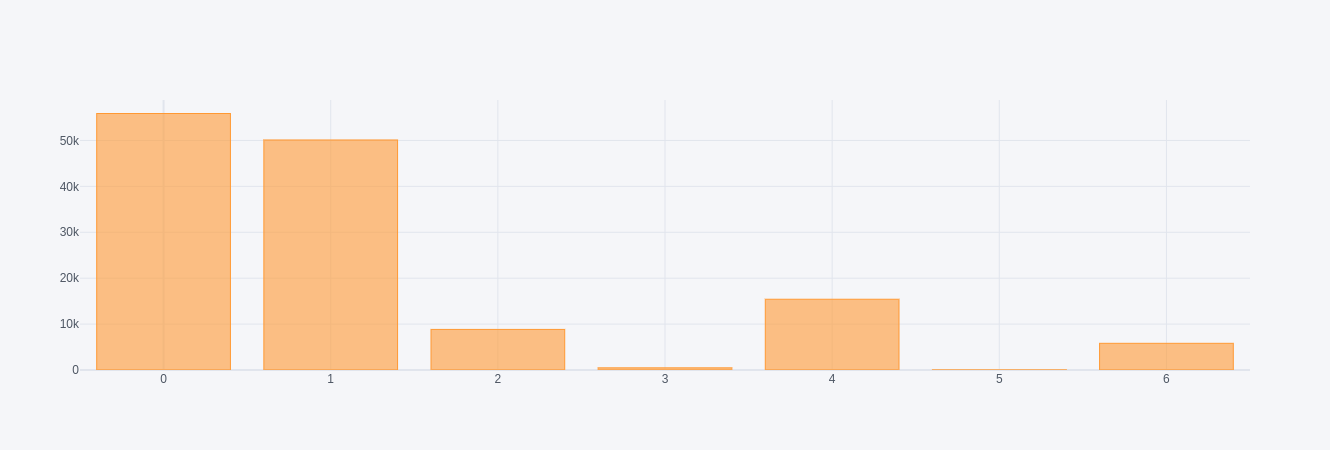

In [350]:
df_bb.Batsman_Scored.value_counts().iplot(kind="bar")

### Types of Dismissal and Frequency

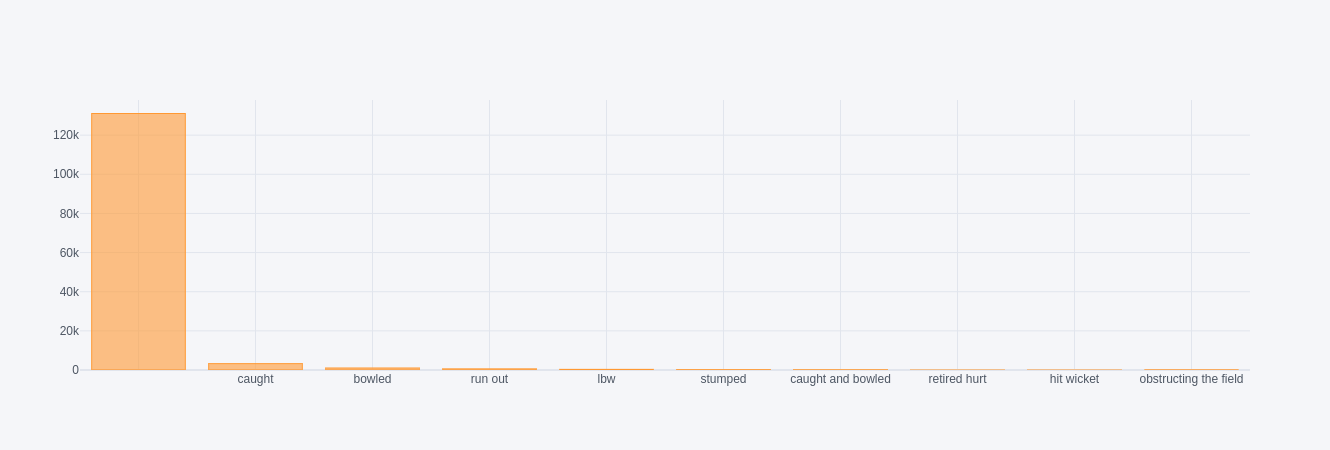

In [316]:
df_bb.Dissimal_Type.value_counts().iplot(kind="bar")

In [696]:
df_bb.Dissimal_Type.value_counts().index.values

array([' ', 'caught', 'bowled', 'run out', 'lbw', 'stumped',
       'caught and bowled', 'retired hurt', 'hit wicket',
       'obstructing the field'], dtype=object)

In [697]:
df_bb.Dissimal_Type.value_counts().values

array([131058,   3245,   1028,    583,    326,    187,    148,      8,
            6,      1])

### Boundaries and Run Count

In [365]:
possible_runs = ['0', '1', '2', '3', '4', '5', '6']
boundaries = ['4', '6']

In [368]:
count_runs = sum(df_bb[df_bb.Batsman_Scored.isin(possible_runs)].Batsman_Scored.astype(int))
count_boundaries = df_bb[df_bb.Batsman_Scored.isin(boundaries)].Batsman_Scored.astype(int).values.shape[0]

In [375]:
print(f'total runs = {count_runs}\ntotal boundaries = {count_boundaries}\nTotal Balls Delivered = {df_bb.shape[0]}')

total runs = 165950
total boundaries = 21226
Total Balls Delivered = 136590


## Ball by Ball Analysis

In [878]:
# read the data
df_bb = pd.read_csv("../../data/Ball_by_Ball.csv")
df_match = pd.read_csv("../../data/Match.csv")
df_player_match = pd.read_csv("../../data/Player_Match.csv")
df_player = pd.read_csv("../../data/Player.csv")
df_season = pd.read_csv("../../data/Season.csv")
df_team = pd.read_csv("../../data/Team.csv")

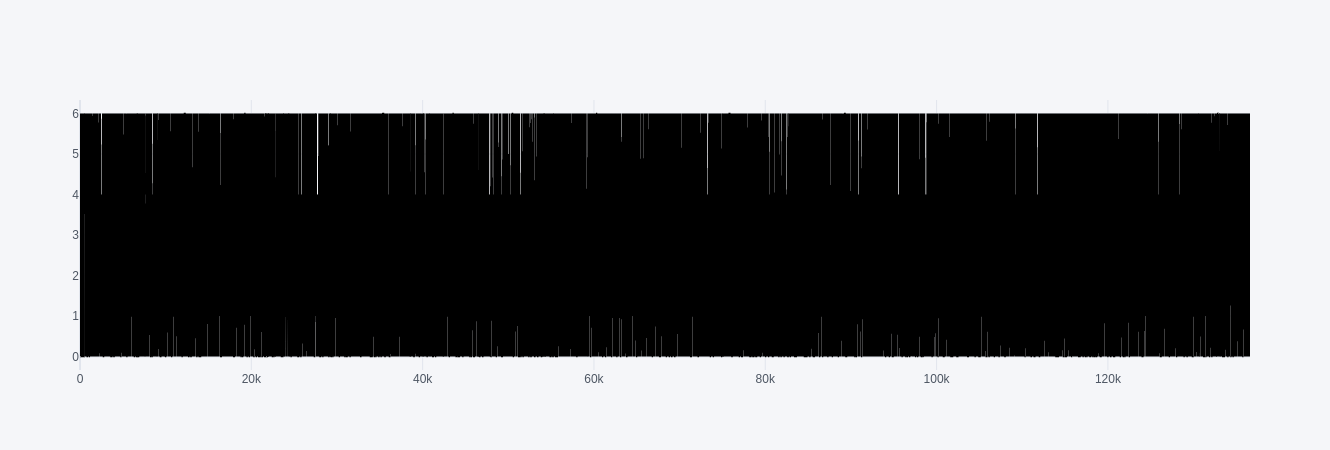

In [487]:
df_bb.Batsman_Scored.iplot(kind="scatter", colors="black")

### Top-20 batsman who have faced the most deliveries

In [482]:
get_names(df_bb.Striker_Id.value_counts().index)[:20]

['V Kohli',
 'SK Raina',
 'G Gambhir',
 'RG Sharma',
 'RV Uthappa',
 'S Dhawan',
 'DA Warner',
 'MS Dhoni',
 'CH Gayle',
 'JH Kallis',
 'AM Rahane',
 'AB de Villiers',
 'M Vijay',
 'KD Karthik',
 'SR Tendulkar',
 'BB McCullum',
 'YK Pathan',
 'R Dravid',
 'AT Rayudu',
 'SR Watson']

In [515]:
df_bb.head(10)

Match_Id  Innings_Id  Over_Id  Ball_Id  Team_Batting_Id  Team_Bowling_Id  \
0    335987           1        1        1                1                2   
1    335987           1        1        2                1                2   
2    335987           1        1        3                1                2   
3    335987           1        1        4                1                2   
4    335987           1        1        5                1                2   
5    335987           1        1        6                1                2   
6    335987           1        1        7                1                2   
7    335987           1        2        1                1                2   
8    335987           1        2        2                1                2   
9    335987           1        2        3                1                2   

   Striker_Id  Striker_Batting_Position  Non_Striker_Id  Bowler_Id  \
0           1                         1               2         14   
1           2                         2               1         14   
2           2                         2               1         14   
3           2                         2               1         14   
4           2                         2               1         14   
5           2                         2               1         14   
6           2                         2               1         14   
7           2                         2               1         15   
8           2                         2               1         15   
9           2                         2               1         15   

  Batsman_Scored Extra_Type Extra_Runs Player_dissimal_Id Dissimal_Type  \
0              0    legbyes          1                                    
1              0                                                          
2              0      wides          1                                    
3              0                                                          
4              0                                                          
5              0                                                          
6              0    legbyes          1                                    
7              0                                                          
8              4                                                          
9              4                                                          

  Fielder_Id  
0             
1             
2             
3             
4             
5             
6             
7             
8             
9

In [526]:
# df_bb.Batsman_Scored.groupby('Striker_Id').value_counts()

In [468]:
df_player.head(2)

Player_Id  Player_Name        DOB Batting_Hand     Bowling_Skill  \
0          1   SC Ganguly   8-Jul-72    Left_Hand  Right-arm medium   
1          2  BB McCullum  27-Sep-81   Right_Hand  Right-arm medium   

       Country  Is_Umpire  Unnamed: 7  
0        India          0         NaN  
1  New Zealand          0         NaN

In [469]:
df_player_match.head(2)

Match_Id  Player_Id  Team_Id  Is_Keeper  Is_Captain
0    335987          1        1          0           1
1    335987          2        1          0           0

### Seasons in Nutshell

In [471]:
df_season.head(100)

Season_Id  Season_Year  Orange_Cap_Id  Purple_Cap_Id  Man_of_the_Series_Id
0          1         2008            100            102                    32
1          2         2009             18             61                    53
2          3         2010            133            131                   133
3          4         2011            162            194                   162
4          5         2012            162            190                   315
5          6         2013             19             71                    32
6          7         2014             46            364                   305
7          8         2015            187             71                   334
8          9         2016              8            299                     8

In [516]:
# orange cap
get_names(df_season.Orange_Cap_Id.values)

['SE Marsh',
 'ML Hayden',
 'SR Tendulkar',
 'CH Gayle',
 'CH Gayle',
 'MEK Hussey',
 'RV Uthappa',
 'DA Warner',
 'V Kohli']

In [518]:
# purple cap
get_names(df_season.Purple_Cap_Id.values)

['Sohail Tanvir',
 'RP Singh',
 'PP Ojha',
 'SL Malinga',
 'M Morkel',
 'DJ Bravo',
 'MM Sharma',
 'DJ Bravo',
 'B Kumar']

In [519]:
## mots
get_names(df_season.Man_of_the_Series_Id.values)

['SR Watson',
 'AC Gilchrist',
 'SR Tendulkar',
 'CH Gayle',
 'SP Narine',
 'SR Watson',
 'GJ Maxwell',
 'AD Russell',
 'V Kohli']

### Champions and Runner-ups analysis

In [858]:
season = []

champions = []
runner_up = []

champ_freq = dict.fromkeys(teams, 0)
runner_up_freq = dict.fromkeys(teams, 0)

venues = []

for sid in df_season.Season_Id+2007:
    
    season.append(sid)
    
    df_ = df_match[df_match.Season_Id==sid].iloc[-1]
       
    v = df_.Venue_Name.split(",")[0] + ", " + df_.City_Name +", "+ df_.Host_Country
    
    venues.append(v) 
    
    champ, champ_short_name  = get_teams([df_.Match_Winner_Id])
    
    champions.append(champ_short_name[0])
    
    champ_freq[champ[0]] += 1
    
    if df_.Match_Winner_Id == df_.Team_Name_Id:
        ru = df_.Opponent_Team_Id
    else:
        ru = df_.Team_Name_Id
    
    ru, run_short_name = get_teams([ru])
    
    runner_up_freq[ru[0]] += 1
    runner_up.append(run_short_name[0])

In [859]:
runner_up

['CSK', 'RCB', 'MI', 'RCB', 'CSK', 'CSK', 'KXIP', 'CSK', 'RCB']

In [860]:
champions

['RR', 'DC', 'CSK', 'CSK', 'KKR', 'MI', 'KKR', 'MI', 'SRH']

In [869]:
final_fixtures = []

for champ, ru in zip(champions, runner_up):
    final_fixtures.append(champ + ' Vs ' + ru)
#     print(champ + ' Vs ' + ru)

In [870]:
final_fixtures

['RR Vs CSK',
 'DC Vs RCB',
 'CSK Vs MI',
 'CSK Vs RCB',
 'KKR Vs CSK',
 'MI Vs CSK',
 'KKR Vs KXIP',
 'MI Vs CSK',
 'SRH Vs RCB']

In [850]:
# [df_.Match_Winner_Id]

In [877]:
# get_teams([df_.Match_Winner_Id])

In [843]:
# venues

In [839]:
# df_match[df_match.Season_Id==2008].iloc[-1]

In [599]:
champ.values()

dict_values([2, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0])

In [600]:
runner_up.values()

dict_values([4, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [597]:
teams

['Chennai Super Kings',
 'Royal Challengers Bangalore',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Kings XI Punjab',
 'Delhi Daredevils',
 'Sunrisers Hyderabad',
 'Deccan Chargers',
 'Pune Warriors',
 'Gujarat Lions',
 'Kochi Tuskers Kerala',
 'Rising Pune Supergiants']

In [588]:
champ = dict.fromkeys(teams, 0)

{'Chennai Super Kings': 0,
 'Royal Challengers Bangalore': 0,
 'Mumbai Indians': 0,
 'Kolkata Knight Riders': 0,
 'Rajasthan Royals': 0,
 'Kings XI Punjab': 0,
 'Delhi Daredevils': 0,
 'Sunrisers Hyderabad': 0,
 'Deccan Chargers': 0,
 'Pune Warriors': 0,
 'Gujarat Lions': 0,
 'Kochi Tuskers Kerala': 0,
 'Rising Pune Supergiants': 0}

In [701]:
season

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [702]:
venues

['Dr DY Patil Sports Academy, Mumbai, India',
 'New Wanderers Stadium, Johannesburg, South Africa',
 'Dr DY Patil Sports Academy, Mumbai, India',
 'MA Chidambaram Stadium, Chennai, India',
 'MA Chidambaram Stadium, Chennai, India',
 'Eden Gardens, Kolkata, India',
 'M Chinnaswamy Stadium, Bangalore, India',
 'Eden Gardens, Kolkata, India',
 'M Chinnaswamy Stadium, Bangalore, India']

In [831]:
# df_match.iloc[-1]

In [830]:
for winner, runner in zip()

dict_keys(['Chennai Super Kings', 'Royal Challengers Bangalore', 'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals', 'Kings XI Punjab', 'Delhi Daredevils', 'Sunrisers Hyderabad', 'Deccan Chargers', 'Pune Warriors', 'Gujarat Lions', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants'])

## Ball by Ball Analysis

- remove the dead ball

In [727]:
df_bb = pd.read_csv("../../data/Ball_by_Ball.csv")

In [728]:
# remove the unsupported entries from batsman scored and extra runs
df_bb.Batsman_Scored.replace(['Do_nothing', ' ', ''], ['0', '0', '0'], inplace=True)
df_bb.Extra_Runs.replace(['Do_nothing', ' ', ''], ['0', '0', '0'], inplace=True)

In [729]:
df_bb.head()

Match_Id  Innings_Id  Over_Id  Ball_Id  Team_Batting_Id  Team_Bowling_Id  \
0    335987           1        1        1                1                2   
1    335987           1        1        2                1                2   
2    335987           1        1        3                1                2   
3    335987           1        1        4                1                2   
4    335987           1        1        5                1                2   

   Striker_Id  Striker_Batting_Position  Non_Striker_Id  Bowler_Id  \
0           1                         1               2         14   
1           2                         2               1         14   
2           2                         2               1         14   
3           2                         2               1         14   
4           2                         2               1         14   

  Batsman_Scored Extra_Type Extra_Runs Player_dissimal_Id Dissimal_Type  \
0              0    legbyes          1                                    
1              0                     0                                    
2              0      wides          1                                    
3              0                     0                                    
4              0                     0                                    

  Fielder_Id  
0             
1             
2             
3             
4

In [730]:
# df_bb.tail(4)

In [731]:
# chang the type of batsman scored and extra runs
df_bb.Batsman_Scored = df_bb.Batsman_Scored.astype(int)
df_bb.Extra_Runs = df_bb.Extra_Runs.astype(int)

# sum and batsman score and extra runs
df_bb['runs'] = df_bb.Batsman_Scored  + df_bb.Extra_Runs 

In [732]:
df_bb.Batsman_Scored

0         0
1         0
2         0
3         0
4         0
         ..
136585    2
136586    0
136587    0
136588    1
136589    4
Name: Batsman_Scored, Length: 136590, dtype: int64

In [733]:
df_bb.Batsman_Scored.sum()

165950

In [734]:
df_bb.Extra_Runs.sum()

8015

In [735]:
df_bb.runs.sum()

173965

In [736]:
r_idx = df_bb.Batsman_Scored.value_counts().index.values
r_value = df_bb.Batsman_Scored.value_counts().values

In [737]:
r_idx

array([0, 1, 4, 2, 6, 3, 5])

In [738]:
r_value

array([55900, 50107, 15413,  8842,  5813,   473,    42])

## Season wise runs scroe by each team

In [746]:
df_match.head(1)

Match_Id Match_Date  Team_Name_Id  Opponent_Team_Id  Season_Id  \
0    335987  18-Apr-08             2                 1          1   

              Venue_Name  Toss_Winner_Id Toss_Decision  IS_Superover  \
0  M Chinnaswamy Stadium               2         field             0   

   IS_Result  Is_DuckWorthLewis Win_Type  Won_By  Match_Winner_Id  \
0          1                  0  by runs   140.0              1.0   

   Man_Of_The_Match_Id  First_Umpire_Id  Second_Umpire_Id  City_Name  \
0                  2.0              470               477  Bangalore   

  Host_Country  
0        India

In [739]:
df_bb.head()

Match_Id  Innings_Id  Over_Id  Ball_Id  Team_Batting_Id  Team_Bowling_Id  \
0    335987           1        1        1                1                2   
1    335987           1        1        2                1                2   
2    335987           1        1        3                1                2   
3    335987           1        1        4                1                2   
4    335987           1        1        5                1                2   

   Striker_Id  Striker_Batting_Position  Non_Striker_Id  Bowler_Id  \
0           1                         1               2         14   
1           2                         2               1         14   
2           2                         2               1         14   
3           2                         2               1         14   
4           2                         2               1         14   

   Batsman_Scored Extra_Type  Extra_Runs Player_dissimal_Id Dissimal_Type  \
0               0    legbyes           1                                    
1               0                      0                                    
2               0      wides           1                                    
3               0                      0                                    
4               0                      0                                    

  Fielder_Id  runs  
0                1  
1                0  
2                1  
3                0  
4                0

In [740]:
# df_bb['Season_Id'] = df_match.Season_Id[df_match.Match_Id == df_bb.Match_Id.uique()]

In [741]:
# df_bb.Match_Id.unique().head()

In [742]:
df_match.Match_Id.shape

(577,)

In [776]:
# df_bb.groupby(df_bb.Match_Id).runs.sum().values

### Most Runs

In [758]:
batsman_ids = df_bb.groupby(df_bb.Striker_Id).runs.sum().sort_values(ascending=False).index.values[:10]
runs = df_bb.groupby(df_bb.Striker_Id).runs.sum().sort_values(ascending=False).values[:10]
batsmans =  get_names(batsman_ids)

In [759]:
batsmans

['SK Raina',
 'V Kohli',
 'RG Sharma',
 'G Gambhir',
 'CH Gayle',
 'RV Uthappa',
 'DA Warner',
 'MS Dhoni',
 'AB de Villiers',
 'S Dhawan']

In [760]:
runs

array([4273, 4246, 3963, 3817, 3633, 3560, 3507, 3399, 3373, 3245])

### Most Wickets

In [763]:
df_bb.Dissimal_Type.value_counts().index.values

array([' ', 'caught', 'bowled', 'run out', 'lbw', 'stumped',
       'caught and bowled', 'retired hurt', 'hit wicket',
       'obstructing the field'], dtype=object)

In [770]:
# remove those dismissal types which does not count in bowlers account 
df_bb_filtered = df_bb[
    (df_bb.Dissimal_Type!=' ') & 
    (df_bb.Dissimal_Type!='run out') & 
    (df_bb.Dissimal_Type!='retired hurt') &
    (df_bb.Dissimal_Type!='retired hurt')
]
df_bb_filtered['wicket'] = 1

In [771]:
df_bb_filtered.head(10)

Match_Id  Innings_Id  Over_Id  Ball_Id  Team_Batting_Id  Team_Bowling_Id  \
33     335987           1        6        2                1                2   
74     335987           1       13        1                1                2   
106    335987           1       18        1                1                2   
131    335987           2        2        1                2                1   
138    335987           2        3        2                2                1   
154    335987           2        5        5                2                1   
157    335987           2        6        2                2                1   
174    335987           2        8        5                2                1   
177    335987           2        9        2                2                1   
183    335987           2        9        8                2                1   

     Striker_Id  Striker_Batting_Position  Non_Striker_Id  Bowler_Id  \
33            1                         1               2         15   
74            3                         3               2          9   
106           4                         4               2         13   
131           6                         1               7         84   
138           8                         3               7        106   
154           9                         4               7         82   
157           7                         2              10        106   
174          11                         6              10          1   
177          12                         7              10         82   
183          10                         5              13         82   

     Batsman_Scored Extra_Type  Extra_Runs Player_dissimal_Id Dissimal_Type  \
33                0                      0                  1        caught   
74                0                      0                  3        caught   
106               0                      0                  4        caught   
131               0                      0                  6        bowled   
138               0                      0                  8        bowled   
154               0                      0                  9        caught   
157               0                      0                  7        caught   
174               0                      0                 11        caught   
177               0                      0                 12        caught   
183               0                      0                 10        caught   

    Fielder_Id  runs  wicket  
33           9     0       1  
74          14     0       1  
106         10     0       1  
131                0       1  
138                0       1  
154         83     0       1  
157          3     0       1  
174         83     0       1  
177          3     0       1  
183         62     0       1

In [772]:
bowler_ids = df_bb_filtered.groupby(df_bb_filtered.Bowler_Id).wicket.sum().sort_values(ascending=False).index.values[:10]
wickets = df_bb_filtered.groupby(df_bb_filtered.Bowler_Id).wicket.sum().sort_values(ascending=False).values[:10]
bowlers =  get_names(bowler_ids)

In [774]:
wickets

array([120, 107, 101, 100,  98,  81,  79,  76,  75,  74])

In [777]:
df_match['total_runs']  = df_bb.groupby(df_bb.Match_Id).runs.sum().values

In [784]:
# for season in df_season.Season_Id:
#     df_match[df_match.Season_Id==season].total_runs.iplot(kind="scatter")
    

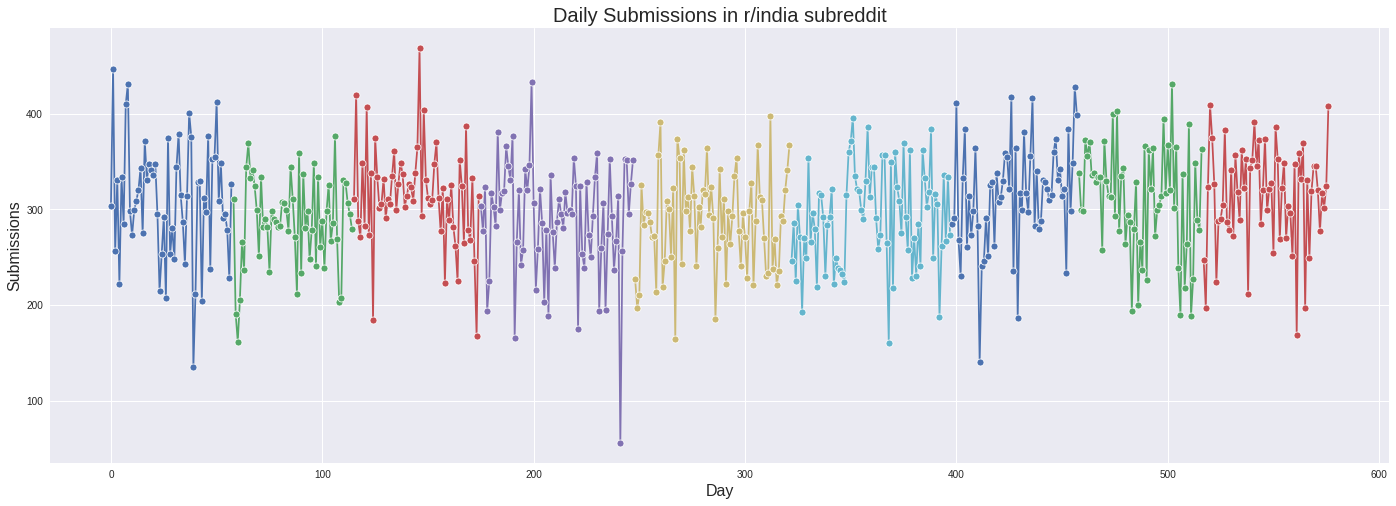

In [791]:
plt.figure(figsize=(24, 8))
# ax = sns.lineplot(data=df_match.groupby(df_match.Season_Id).count(), marker="o")

for season in df_season.Season_Id:
    ax = sns.lineplot(data=df_match[df_match.Season_Id==season].total_runs, marker='o')


plt.title("Daily Submissions in r/india subreddit", fontdict={"fontsize":20})
plt.xlabel("Day", fontdict={"fontsize":16})
plt.ylabel("Submissions", fontdict={"fontsize":16})
plt.axis("tight")
plt.show()

In [801]:
df_match.Season_Id = df_match.Season_Id+2007

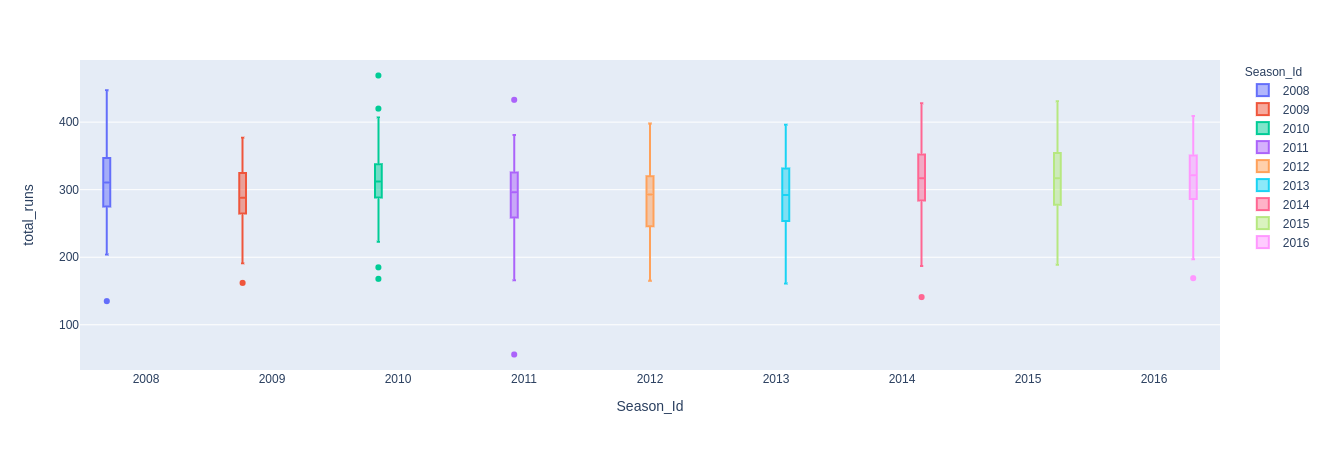

In [802]:
fig = px.box(df_match, x='Season_Id', y='total_runs', color='Season_Id')
fig.show()

In [803]:
df_match.Season_Id.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [820]:
_len = []
for season in df_season.Season_Year:
    
    d = df_match.total_runs[df_match.Season_Id==season].values
    print(np.pad(d, pad_width=76 - d.shape[0]).tolist())
#     _len.append(len(df_match.total_runs[df_match.Season_Id==season].values.tolist()))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 304, 447, 257, 331, 222, 334, 285, 410, 431, 298, 273, 299, 309, 320, 343, 275, 372, 331, 347, 341, 336, 347, 295, 215, 253, 292, 207, 375, 253, 281, 248, 344, 379, 315, 287, 243, 314, 401, 376, 135, 212, 329, 330, 204, 312, 297, 377, 238, 353, 355, 412, 309, 349, 291, 295, 279, 228, 327, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 311, 191, 162, 205, 266, 237, 344, 369, 333, 341, 324, 299, 251, 334, 282, 290, 282, 235, 298, 290, 287, 282, 283, 308, 307, 299, 278, 344, 311, 271, 212, 359, 234, 337, 281, 298, 248, 279, 349, 241, 334, 261, 288, 239, 298, 326, 267, 286, 377, 269, 203, 208, 331, 328, 307, 295, 280, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 311, 420, 288, 271, 349, 283, 407, 273, 338, 185, 375, 334, 302, 306, 332, 291, 311, 306, 335, 361, 299, 327, 349, 337, 303, 314, 327, 323, 309, 338, 36

In [818]:
[a for a in _len]

[58, 57, 60, 73, 74, 76, 60, 59, 60]

In [883]:
# df_match.index.values

In [824]:
# df_match[df_match.Season_Id==2016].shape

(60, 20)

In [826]:
from geopy import geocoders  

In [828]:
# gn = geocoders.GeoNames()

In [871]:
df_match.head()

Match_Id Match_Date  Team_Name_Id  Opponent_Team_Id  Season_Id  \
0    335987  18-Apr-08             2                 1       2008   
1    335988  19-Apr-08             4                 3       2008   
2    335989  19-Apr-08             6                 5       2008   
3    335990  20-Apr-08             7                 2       2008   
4    335991  20-Apr-08             1                 8       2008   

                                   Venue_Name  Toss_Winner_Id Toss_Decision  \
0                       M Chinnaswamy Stadium               2         field   
1  Punjab Cricket Association Stadium, Mohali               3           bat   
2                            Feroz Shah Kotla               5           bat   
3                            Wankhede Stadium               7           bat   
4                                Eden Gardens               8           bat   

   IS_Superover  IS_Result  Is_DuckWorthLewis    Win_Type  Won_By  \
0             0          1                  0     by runs   140.0   
1             0          1                  0     by runs    33.0   
2             0          1                  0  by wickets     9.0   
3             0          1                  0  by wickets     5.0   
4             0          1                  0  by wickets     5.0   

   Match_Winner_Id  Man_Of_The_Match_Id  First_Umpire_Id  Second_Umpire_Id  \
0              1.0                  2.0              470               477   
1              3.0                 19.0              471               487   
2              6.0                 90.0              472               512   
3              2.0                 11.0              473               476   
4              1.0                  4.0              474               486   

    City_Name Host_Country  total_runs  
0   Bangalore        India         304  
1  Chandigarh        India         447  
2       Delhi        India         257  
3      Mumbai        India         331  
4     Kolkata        India         222

In [879]:
df_match.Venue_Name = df_match.Venue_Name.apply(lambda x: x.split(',')[0])

In [880]:
df_match['Venue']  = df_match.Venue_Name + ', '  + df_match.City_Name + ', ' + df_match.Host_Country

In [884]:
df_match.Venue.unique()

array(['M Chinnaswamy Stadium, Bangalore, India',
       'Punjab Cricket Association Stadium, Chandigarh, India',
       'Feroz Shah Kotla, Delhi, India',
       'Wankhede Stadium, Mumbai, India', 'Eden Gardens, Kolkata, India',
       'Sawai Mansingh Stadium, Jaipur, India',
       'Rajiv Gandhi International Stadium, Hyderabad, India',
       'MA Chidambaram Stadium, Chennai, India',
       'Dr DY Patil Sports Academy, Mumbai, India',
       'Newlands, Cape Town, South Africa',
       "St George's Park, Port Elizabeth, South Africa",
       'Kingsmead, Durban, South Africa',
       'SuperSport Park, Centurion, South Africa',
       'Buffalo Park, East London, South Africa',
       'New Wanderers Stadium, Johannesburg, South Africa',
       'De Beers Diamond Oval, Kimberley, South Africa',
       'OUTsurance Oval, Bloemfontein, South Africa',
       'Brabourne Stadium, Mumbai, India',
       'Sardar Patel Stadium, Ahmedabad, India',
       'Barabati Stadium, Cuttack, India',
       'V